# CONTENT

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features.


There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here. The same can be found in the Data Description sheet.

# Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

# CO2 Emissions


The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

# Import Libraries 

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn .metrics import r2_score

In [34]:
df = pd.read_csv("C:\\Users\\GOURAV NEGI\\Downloads\\archive (17)\CO2 Emissions_Canada.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [35]:
df.rename(columns = {'Make':'Brand'},inplace = True)

In [36]:
df.head()

,Brand,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Brand                             7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [38]:
df.shape

(7385, 12)

In [39]:
df.isnull().sum()

Brand                               0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [41]:
df.columns

Index(['Brand', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [42]:
def clean_name(name):
    return name.strip().lower().replace("/", "_per_").replace(" ","_")

In [43]:
df.rename(columns = clean_name,inplace = True)

In [44]:
df.head()

,brand,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


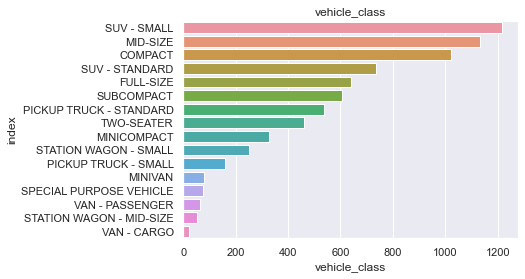

In [45]:
sns.set()
plt.title('vehicle_class')
sns.barplot(x = 'vehicle_class', y = 'index' ,data = df.vehicle_class.value_counts().reset_index())
plt.show()

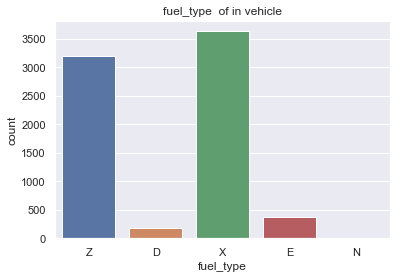

In [46]:
#fuel type 
sns.countplot(df.fuel_type)
plt.title("fuel_type  of in vehicle");

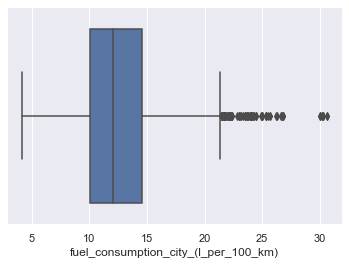

In [47]:
sns.boxplot(df['fuel_consumption_city_(l_per_100_km)']);

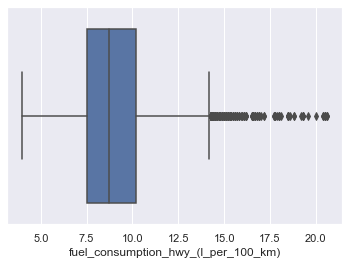

In [48]:
sns.boxplot(df['fuel_consumption_hwy_(l_per_100_km)']);

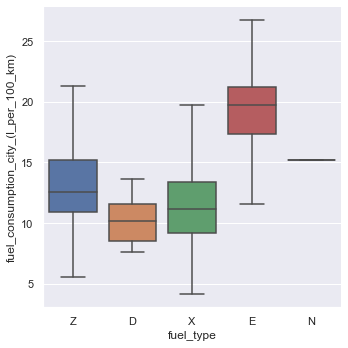

In [49]:
sns.catplot(x = 'fuel_type', y = 'fuel_consumption_city_(l_per_100_km)', data =df,kind = 'box',sym="")

In [50]:
df.head()

,brand,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


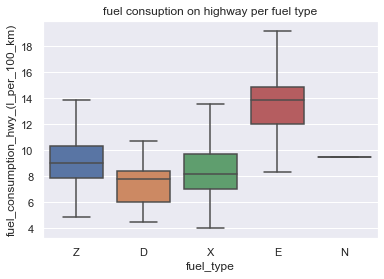

In [51]:
sns.boxplot(x = 'fuel_type', y ='fuel_consumption_hwy_(l_per_100_km)',data = df,sym = "");
plt.title('fuel consuption on highway per fuel type');

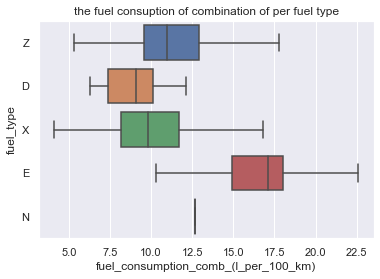

In [52]:
sns.boxplot(y = 'fuel_type',x = 'fuel_consumption_comb_(l_per_100_km)',data =df,sym = "")
plt.title('the fuel consuption of combination of per fuel type');

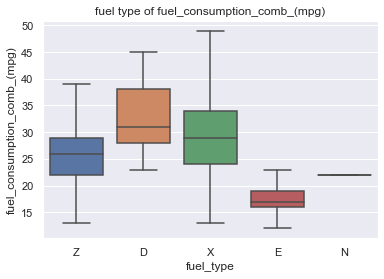

In [53]:
sns.boxplot(x = 'fuel_type',y = 'fuel_consumption_comb_(mpg)',data = df,sym = '')
plt.title('fuel type of fuel_consumption_comb_(mpg)');

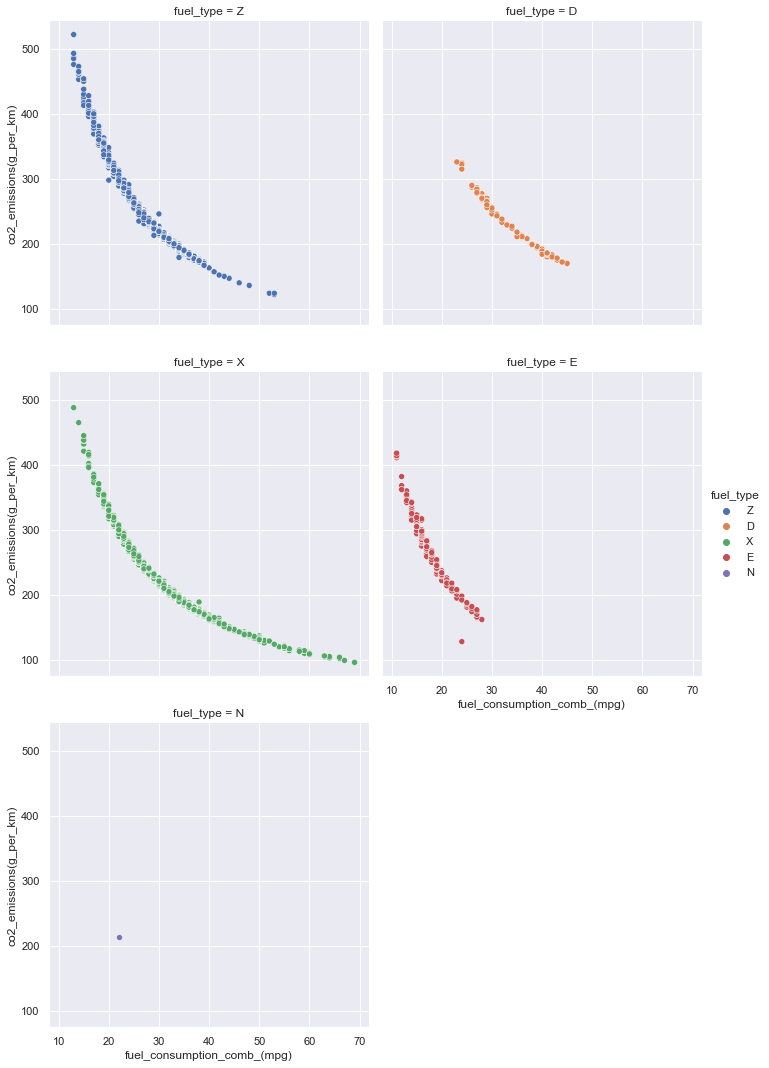

In [54]:
sns.relplot(x = 'fuel_consumption_comb_(mpg)',y='co2_emissions(g_per_km)',data = df,hue = 'fuel_type',col = 'fuel_type',col_wrap=2)
plt.show()

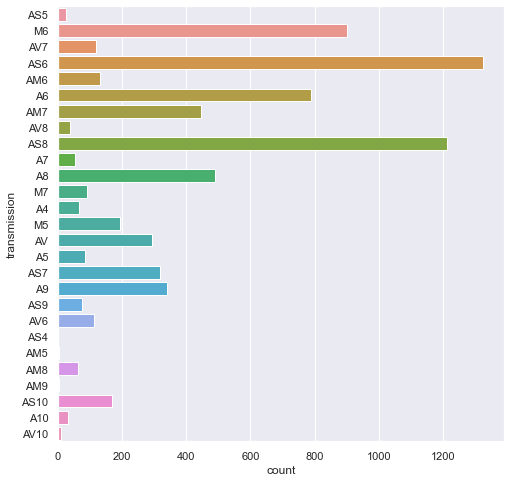

In [55]:
plt.figure(figsize = (8,8))
sns.countplot(y = df['transmission'])
plt.show()

In [56]:
df.head()

,brand,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


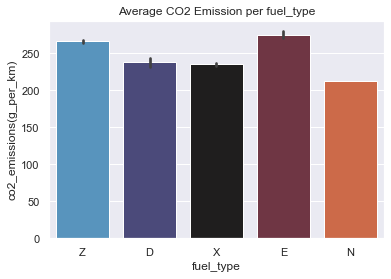

In [57]:
sns.barplot(x = 'fuel_type',y = 'co2_emissions(g_per_km)',data = df,palette = 'icefire');
plt.title('Average CO2 Emission per fuel_type');

# The Fuel type E emittes the most CO2

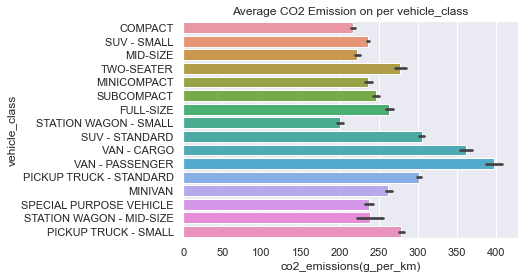

In [58]:
sns.barplot(x = 'co2_emissions(g_per_km)',y = 'vehicle_class',data = df)
plt.title('Average CO2 Emission on per vehicle_class')
plt.show()

VAN-PASSENGER emitts the most CO2 in the vehicle class 

In [59]:
df.head()

,brand,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [61]:
x = df['brand']
x.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [31]:
df.rename(columns = {'Make':'Brand'},inplace = True)

In [32]:
df.head()

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [67]:
#df.drop(columns = ['Model','Vehicle Class','Transmission','Fuel Type'],axis=1,inplace =  True)

<AxesSubplot:>

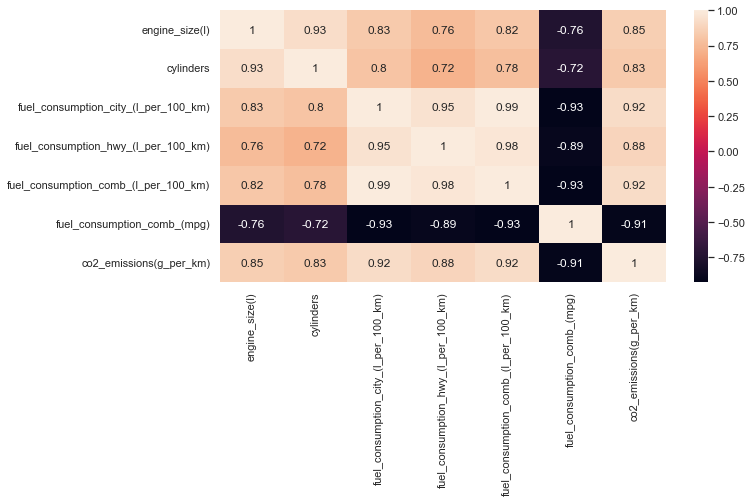

In [78]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True)

In [79]:
df.corr()

,engine_size(l),cylinders,fuel_consumption_city_(l_per_100_km),fuel_consumption_hwy_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),fuel_consumption_comb_(mpg),co2_emissions(g_per_km)
engine_size(l),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_consumption_city_(l_per_100_km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_consumption_hwy_(l_per_100_km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_consumption_comb_(l_per_100_km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
fuel_consumption_comb_(mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2_emissions(g_per_km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


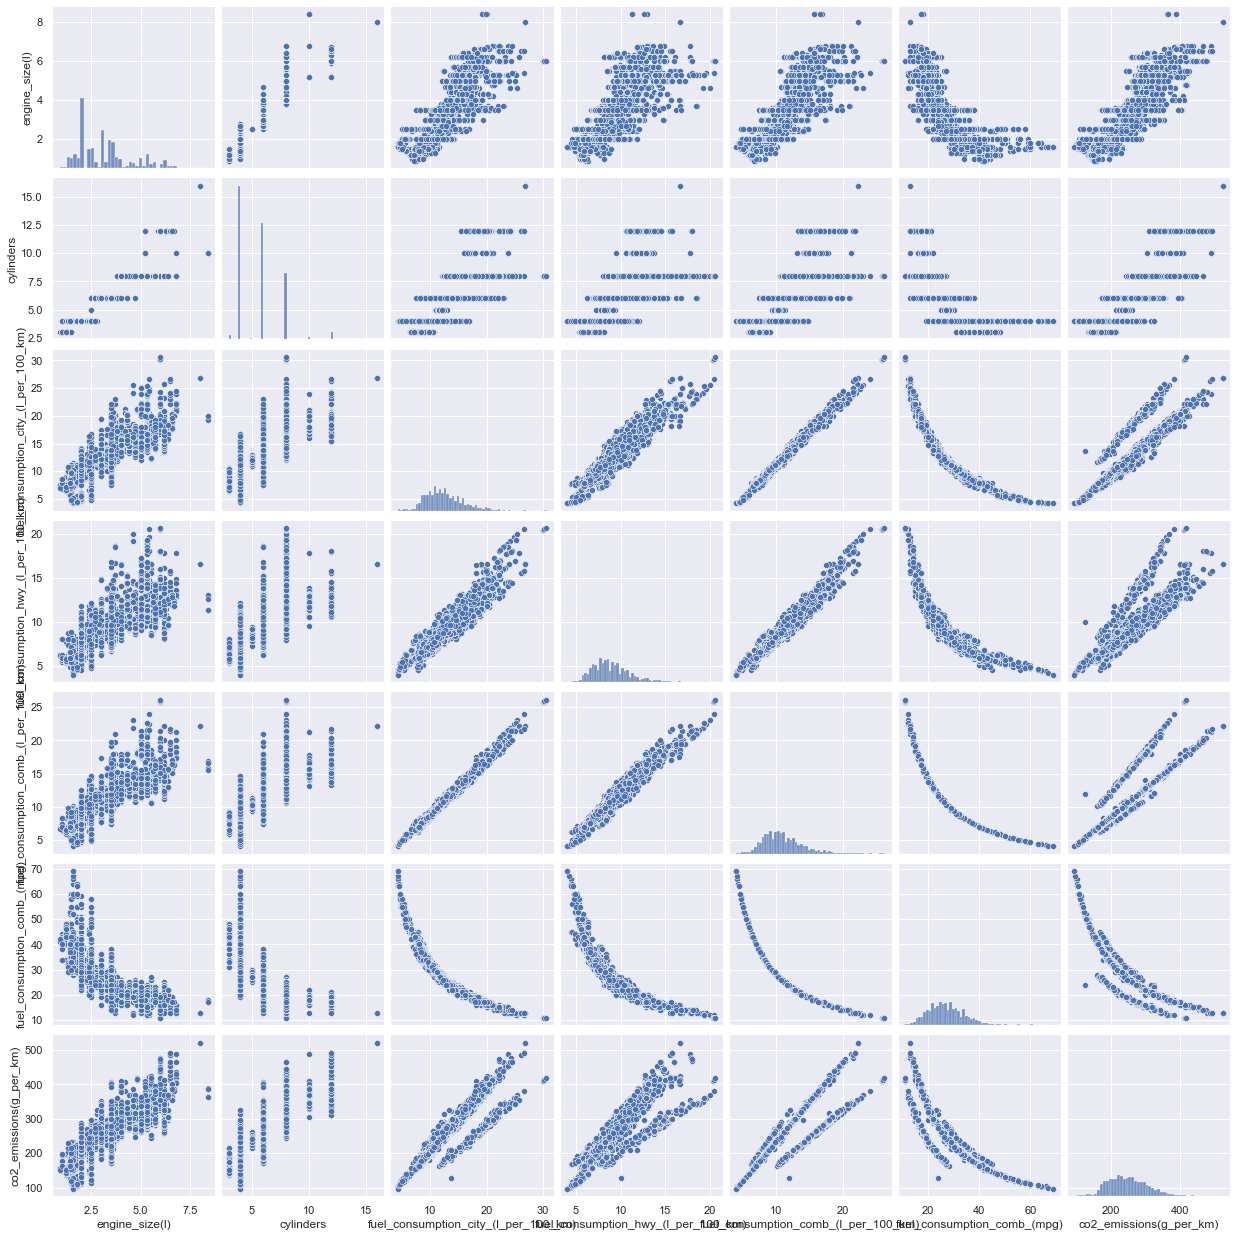

In [80]:
sns.pairplot(df)
plt.show()

In [82]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size(l)', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city_(l_per_100_km)',
       'fuel_consumption_hwy_(l_per_100_km)',
       'fuel_consumption_comb_(l_per_100_km)', 'fuel_consumption_comb_(mpg)',
       'co2_emissions(g_per_km)'],
      dtype='object')

In [83]:
df= df[['engine_size(l)','cylinders', 'fuel_consumption_city_(l_per_100_km)','fuel_consumption_comb_(l_per_100_km)','co2_emissions(g_per_km)']]
df.head()

,engine_size(l),cylinders,fuel_consumption_city_(l_per_100_km),fuel_consumption_comb_(l_per_100_km),co2_emissions(g_per_km)
0,2.0,4,9.9,8.5,196
1,2.4,4,11.2,9.6,221
2,1.5,4,6.0,5.9,136
3,3.5,6,12.7,11.1,255
4,3.5,6,12.1,10.6,244


In [85]:
X = df.drop('co2_emissions(g_per_km)',axis = 1)
y = df['co2_emissions(g_per_km)']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [88]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
predict_train = lr.predict(X_train) 
predict_test = lr.predict(X_test)

In [90]:
predict_test

array([251.29638331, 322.17154763, 323.16737963, ..., 188.35264743,
       244.67165104, 196.86440173])

The r2 score shows our model's performance.We could have used other metrcis like MAE,MSE,RMSE

In [91]:
print('Traing Accuracy :',r2_score(predict_train,y_train))
print('Test Accuracy :',r2_score(predict_test,y_test))

Traing Accuracy : 0.8631771114855146
Test Accuracy : 0.8591522907263798


The R2 score, also known as the coefficient of determination, is a statistical measure that tells you how well a line fits the data. It is used to evaluate the performance of a regression-based machine learning model

The R2 score ranges from 0 to 1, and the higher the score, the better the model fits the data . If the R2 score is 1, it means that the model is perfect and if its value is 0, it means that the model will perform badly on an unseen dataset 

In other words, R2 score measures how much of the variance in the dependent variable (the variable being predicted) is explained by the independent variables (the variables used to make predictions). It works by measuring the amount of variance in the predictions explained by the dataset.

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import accuracy_score

In [106]:
ran  = RandomForestClassifier()
ran.fit(X_train,y_train)
y_pred = ran.predict(X_test)
y_pred

array([253, 344, 322, ..., 184, 240, 193], dtype=int64)

In [111]:
acc = accuracy_score(y_pred,y_test)
acc

0.4949221394719025

In [97]:
from sklearn.metrics import classification_report

In [99]:
class_report = classification_report(y_test,clf.predict(X_test))
#print(class_report)

In [100]:
from xgboost import XGBClassifier

In [101]:
import xgboost as xg
xgb = xg.XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [103]:
pred = xgb.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = math.sqrt(mse)
print('Training Accuracy:',xgb.score(X_train,y_train)*100)
print('Testing Accuracy:',xgb.score(X_test,y_test)*100)
print('Root Mean Squared Error:',rmse)

Training Accuracy: 99.56211522095805
Testing Accuracy: 97.9328033504646
Root Mean Squared Error: 8.432310636458975
